# Unlabeled Regression

If we have two lines of data, how do we decide which points belong to which lines?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

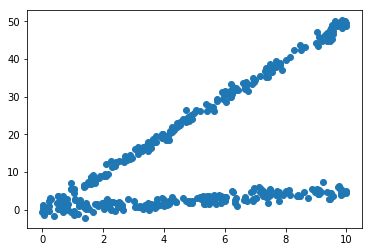

In [2]:
def gen_data(n_points_per_band, beta_1, beta_2):
    X1 = np.random.uniform(0,10,size=(n_points_per_band))
    X2 = np.random.uniform(0,10,size=(n_points_per_band))
    y1 = X1*beta_1 + np.random.normal(0,1, size=(n_points_per_band))
    y2 = X2*beta_2 + np.random.normal(0,1, size=(n_points_per_band))
    X = np.concatenate((X1, X2))
    y = np.concatenate((y1,y2))
    return X, y
#     permute = np.random.permutation(X.shape[0])
#     return X[permute], y[permute]

X, y = gen_data(200, 0.5, 5)

plt.scatter(X,y)

In [3]:
class LinearRegression1D():
    
    def __init__(self, coef=None):
        if not coef:
            self.coef_ = np.random.normal(0,1)
        else:
            self.coef_ = np.array([coef])
        
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        if X.ndim == 1:
            X = X.reshape(-1,1)
        if y.ndim == 1:
            y = y.reshape(-1,1)
        temp_xtx = np.linalg.inv(np.dot(X.T,X))
        temp_xty = np.dot(X.T,y)
        self.coef_ = np.dot(temp_xtx,temp_xty)
    
    def predict(self,X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1,1)
        return np.dot(X, self.coef_)
    

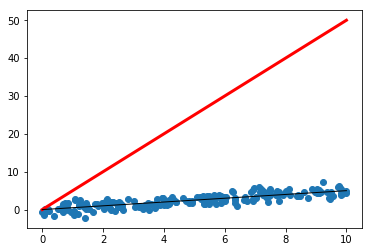

In [4]:
m1 = LinearRegression1D(coef=5)
m2 = LinearRegression1D(coef=0.5)
# print(m1.coef_)
# print(m2.coef_)
pred1 = m1.predict(X)
pred2 = m2.predict(X)
error1 = np.abs(pred1.reshape(-1,1)-y.reshape(-1,1))
error2 = np.abs(pred2.reshape(-1,1)-y.reshape(-1,1))
    
j1 = X[(error1.ravel() > error2.ravel())]
j1y = y[(error1.ravel() > error2.ravel())]

plt.scatter(j1, j1y)
fake_X = np.linspace(0,10,100)
plt.plot(fake_X, m1.coef_[0]*fake_X,'r', lw=3)
plt.plot(fake_X, m2.coef_[0]*fake_X,'k', lw=1)

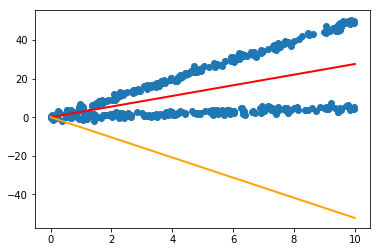

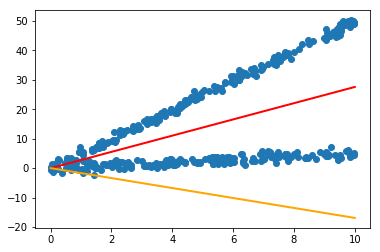

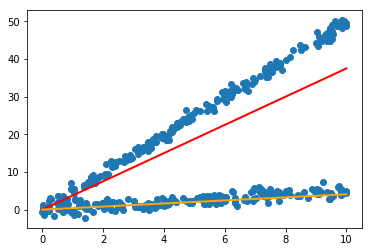

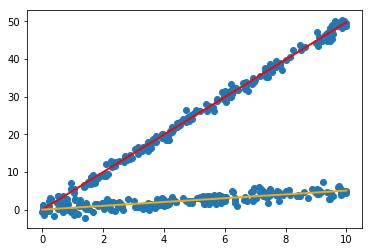

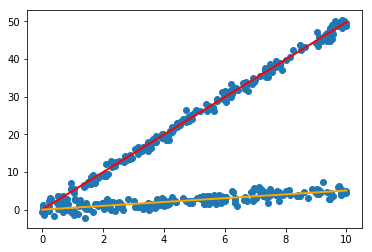

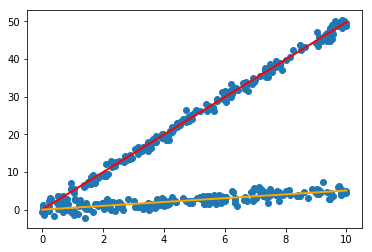

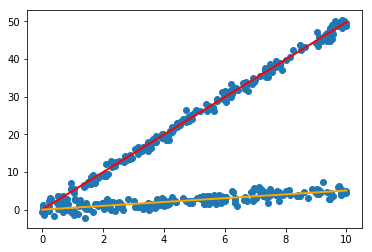

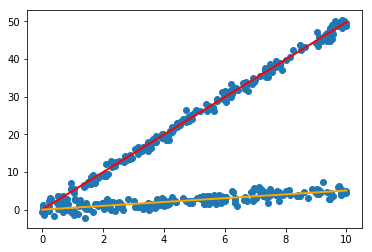

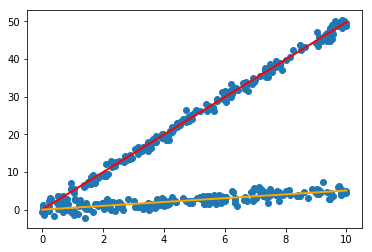

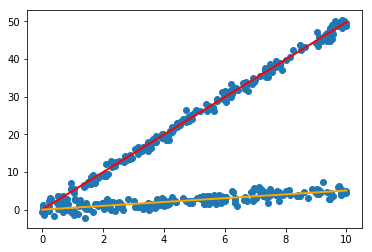

In [7]:
n_iter = 10
m1 = LinearRegression1D(coef=np.random.normal(0,10))
m2 = LinearRegression1D(coef=np.random.normal(0,10))
for _ in range(n_iter):
    error1 = np.abs(m1.predict(X).reshape(-1,1)-y.reshape(-1,1))
    error2 = np.abs(m2.predict(X).reshape(-1,1)-y.reshape(-1,1))
    j1 = X[(error1.ravel() <= error2.ravel())]
    j1y = y[(error1.ravel() <= error2.ravel())]
    j2 = X[(error1.ravel() > error2.ravel())]
    j2y = y[(error1.ravel() > error2.ravel())]
#     print(j1)
#     print(j2)
    if j1.shape[0]:
        m1.fit(j1, j1y)
    if j2.shape[0]:
        m2.fit(j2, j2y)
    plt.figure()
    plt.scatter(X,y)
    fake_X = np.linspace(0,10,100)
    plt.plot(fake_X, m1.coef_[0]*fake_X,'r', lw=2)
    plt.plot(fake_X, m2.coef_[0]*fake_X,'orange', lw=2)